In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow --quiet

In [ ]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [ ]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [ ]:
# Read in the Gold dataset from a CSV file
df=pd.read_csv("/content/drive/MyDrive/PTDLKD/Data/Gold_Data.csv")
df=df.set_index(pd.DatetimeIndex(df['Date'].values))


# Preprocessing Data

---

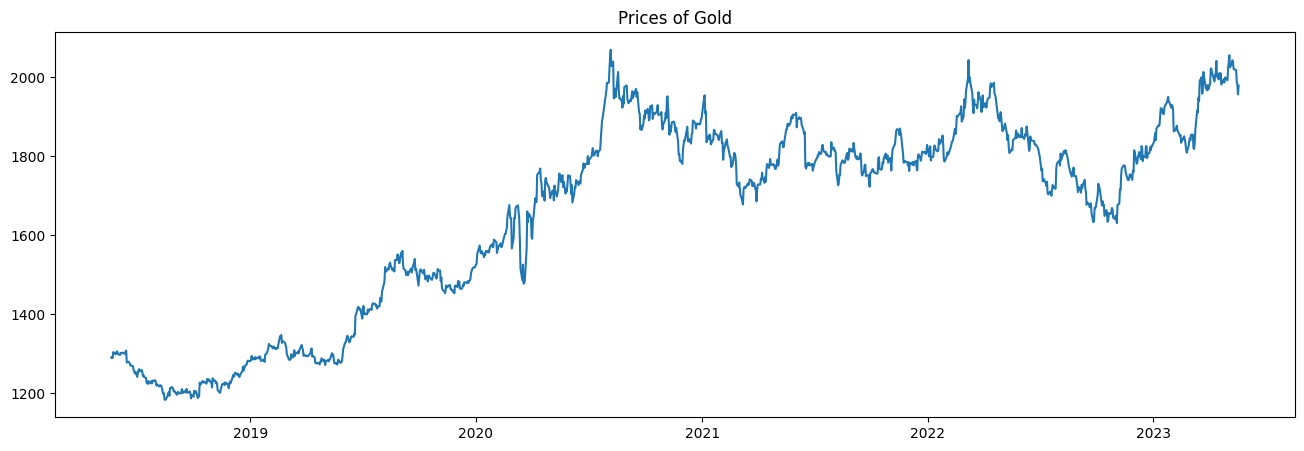

In [ ]:
# Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

# Format column Price to float
df['Price'] = df.Price.str.replace(',','').astype(float)

# Flip the column
df = df.iloc[::-1]

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['Date', 'Price'])
df1.drop('Date', axis = 1, inplace = True)

# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df1['Price'])
plt.title('Prices of Gold')
plt.show()

# Split dataset (7-2-1)

---



In [ ]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [ ]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [ ]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [ ]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.hdf5'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80

Epoch 1: loss improved from inf to 0.15539, saving model to save_model_7_2_1.hdf5
17/17 - 13s - loss: 0.1554 - 13s/epoch - 747ms/step
Epoch 2/80

Epoch 2: loss improved from 0.15539 to 0.05473, saving model to save_model_7_2_1.hdf5
17/17 - 3s - loss: 0.0547 - 3s/epoch - 195ms/step
Epoch 3/80

Epoch 3: loss improved from 0.05473 to 0.03848, saving model to save_model_7_2_1.hdf5
17/17 - 3s - loss: 0.0385 - 3s/epoch - 172ms/step
Epoch 4/80

Epoch 4: loss improved from 0.03848 to 0.03676, saving model to save_model_7_2_1.hdf5
17/17 - 4s - loss: 0.0368 - 4s/epoch - 250ms/step
Epoch 5/80

Epoch 5: loss improved from 0.03676 to 0.03423, saving model to save_model_7_2_1.hdf5
17/17 - 2s - loss: 0.0342 - 2s/epoch - 97ms/step
Epoch 6/80

Epoch 6: loss improved from 0.03423 to 0.03409, saving model to save_model_7_2_1.hdf5
17/17 - 2s - loss: 0.0341 - 2s/epoch - 97ms/step
Epoch 7/80

Epoch 7: loss did not improve from 0.03409
17/17 - 2s - loss: 0.0397 - 2s/epoch - 94ms/step
Epoch 8/80



In [ ]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_7_2_1.hdf5')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

26/26 [==============================] - 2s 35ms/step


In [ ]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

9/9 [==============================] - 0s 23ms/step


In [ ]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 [==============================] - 0s 22ms/step


In [ ]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.7477976056019875, 0.7623672916196069, 0.7415857239665686, 0.7744522249830585, 0.7836006324824938, 0.7821323695504856, 0.7848430088095775, 0.807318725999548, 0.8331827422633835, 0.8311497628190647, 0.8198554325728482, 0.8168059634063698, 0.8165800768014457, 0.8356674949175513, 0.8405240569234245, 0.8495595211203977, 0.8573526089902868, 0.8654845267675624, 0.8511407273548675, 0.8500112943302458, 0.8345380618929297, 0.8419923198554327, 0.8400722837135755, 0.8270838039304267, 0.7667720804156315, 0.7704992093968825, 0.7767110910323018, 0.7831488592726452, 0.7704992093968825, 0.766659137113169, 0.7543483171447933, 0.7567201264964987, 0.7343573526089902, 0.7431669302010389, 0.7413598373616446, 0.7496611700926135, 0.7527671109103231, 0.7437316467133499, 0.7333408628868305, 0.7169640840298168, 0.7061215269934493, 0.7238536254800092, 0.7371809351705445, 0.7470070024847528, 0.7414727806641066, 0.7573977863112713, 0.7573977863112713, 0.718319403659363, 0.7167381974248923, 0.73480912581

In [ ]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8951378464698792], [0.8941462635993958], [0.8865751624107361], [0.8769323229789734], [0.8672706484794617], [0.8589073419570923], [0.8521947860717773], [0.8468420505523682], [0.8423237800598145], [0.8381776213645935], [0.8341403603553772], [0.8301524519920349], [0.8262895941734314], [0.8226770758628845], [0.8194242119789124], [0.8165913820266724], [0.8141872882843018], [0.8121842741966248], [0.8105382323265076], [0.8092047572135925], [0.808148205280304], [0.8073437809944153], [0.8067744374275208], [0.8064266443252563], [0.806286633014679], [0.8063387274742126], [0.8065643906593323], [0.8069434762001038], [0.8074547648429871], [0.8080784678459167]]


In [ ]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[1976.55504926]
 [1975.67710179]
 [1968.9736488 ]
 [1960.43587877]
 [1951.88143216]
 [1944.47656057]
 [1938.53326359]
 [1933.79395156]
 [1929.79347486]
 [1926.12246596]
 [1922.54787506]
 [1919.01698099]
 [1915.59680668]
 [1912.39828297]
 [1909.51819729]
 [1907.01000965]
 [1904.88142505]
 [1903.10795637]
 [1901.6505509 ]
 [1900.46989204]
 [1899.53442096]
 [1898.82218369]
 [1898.3180869 ]
 [1898.01015089]
 [1897.88618487]
 [1897.93230931]
 [1898.13211149]
 [1898.46775383]
 [1898.92044879]
 [1899.47267543]]


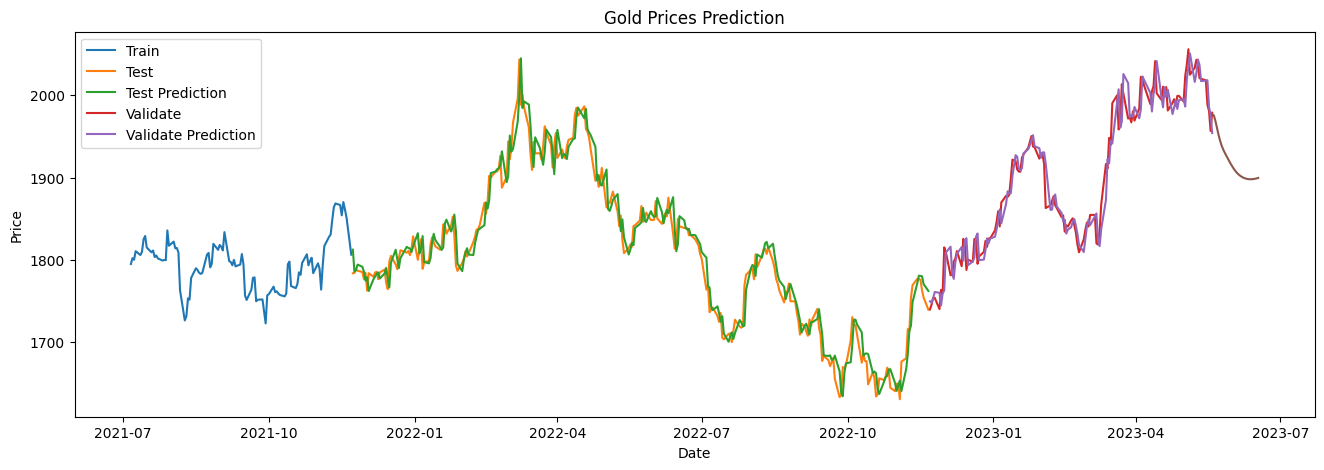

In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Price[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [ ]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  13.548137084489623
MAPE:  0.7485143516089113
RMSE:  17.717296558239916

** Validate **
MAE:  14.090357008713937
MAPE:  0.737692481467568
RMSE:  18.920489693753886


# Split dataset (6-3-1)

---



In [ ]:
# 4. Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [ ]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [ ]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [ ]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_6_3_1.hdf5'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80

Epoch 1: loss improved from inf to 0.20227, saving model to save_model_6_3_1.hdf5
14/14 - 6s - loss: 0.2023 - 6s/epoch - 422ms/step
Epoch 2/80

Epoch 2: loss improved from 0.20227 to 0.05709, saving model to save_model_6_3_1.hdf5
14/14 - 1s - loss: 0.0571 - 1s/epoch - 97ms/step
Epoch 3/80

Epoch 3: loss improved from 0.05709 to 0.03942, saving model to save_model_6_3_1.hdf5
14/14 - 1s - loss: 0.0394 - 1s/epoch - 93ms/step
Epoch 4/80

Epoch 4: loss improved from 0.03942 to 0.03593, saving model to save_model_6_3_1.hdf5
14/14 - 1s - loss: 0.0359 - 1s/epoch - 96ms/step
Epoch 5/80

Epoch 5: loss improved from 0.03593 to 0.03525, saving model to save_model_6_3_1.hdf5
14/14 - 1s - loss: 0.0352 - 1s/epoch - 95ms/step
Epoch 6/80

Epoch 6: loss improved from 0.03525 to 0.03395, saving model to save_model_6_3_1.hdf5
14/14 - 1s - loss: 0.0340 - 1s/epoch - 98ms/step
Epoch 7/80

Epoch 7: loss improved from 0.03395 to 0.03222, saving model to save_model_6_3_1.hdf5
14/14 - 2s - loss: 0.03

In [ ]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_6_3_1.hdf5')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

22/22 [==============================] - 1s 23ms/step


In [ ]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 [==============================] - 0s 23ms/step


In [ ]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 [==============================] - 0s 21ms/step


In [ ]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.7477976056019875, 0.7623672916196069, 0.7415857239665686, 0.7744522249830585, 0.7836006324824938, 0.7821323695504856, 0.7848430088095775, 0.807318725999548, 0.8331827422633835, 0.8311497628190647, 0.8198554325728482, 0.8168059634063698, 0.8165800768014457, 0.8356674949175513, 0.8405240569234245, 0.8495595211203977, 0.8573526089902868, 0.8654845267675624, 0.8511407273548675, 0.8500112943302458, 0.8345380618929297, 0.8419923198554327, 0.8400722837135755, 0.8270838039304267, 0.7667720804156315, 0.7704992093968825, 0.7767110910323018, 0.7831488592726452, 0.7704992093968825, 0.766659137113169, 0.7543483171447933, 0.7567201264964987, 0.7343573526089902, 0.7431669302010389, 0.7413598373616446, 0.7496611700926135, 0.7527671109103231, 0.7437316467133499, 0.7333408628868305, 0.7169640840298168, 0.7061215269934493, 0.7238536254800092, 0.7371809351705445, 0.7470070024847528, 0.7414727806641066, 0.7573977863112713, 0.7573977863112713, 0.718319403659363, 0.7167381974248923, 0.73480912581

In [ ]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8970320224761963], [0.9059451222419739], [0.9064311385154724], [0.9031106233596802], [0.898753821849823], [0.8953197002410889], [0.8937925100326538], [0.8941791653633118], [0.8958655595779419], [0.8980547785758972], [0.9000968933105469], [0.9016425609588623], [0.9026362895965576], [0.903213620185852], [0.9035723209381104], [0.9038736820220947], [0.9041959047317505], [0.9045395255088806], [0.9048576951026917], [0.9050964117050171], [0.9052191376686096], [0.9052188396453857], [0.9051142930984497], [0.9049381017684937], [0.9047240614891052], [0.9045000076293945], [0.9042832255363464], [0.9040820598602295], [0.9038994312286377], [0.9037347435951233]]


In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[1978.2321527 ]
 [1986.12381123]
 [1986.55413004]
 [1983.61414592]
 [1979.75663387]
 [1976.71606259]
 [1975.36388838]
 [1975.70623301]
 [1977.19936645]
 [1979.13770095]
 [1980.94578934]
 [1982.31432347]
 [1983.19417081]
 [1983.70533931]
 [1984.02293296]
 [1984.28975806]
 [1984.57505405]
 [1984.87929589]
 [1985.16100324]
 [1985.37236292]
 [1985.48102449]
 [1985.48076062]
 [1985.38819511]
 [1985.23219531]
 [1985.04268404]
 [1984.84430676]
 [1984.65236789]
 [1984.4742558 ]
 [1984.31255641]
 [1984.16674198]]


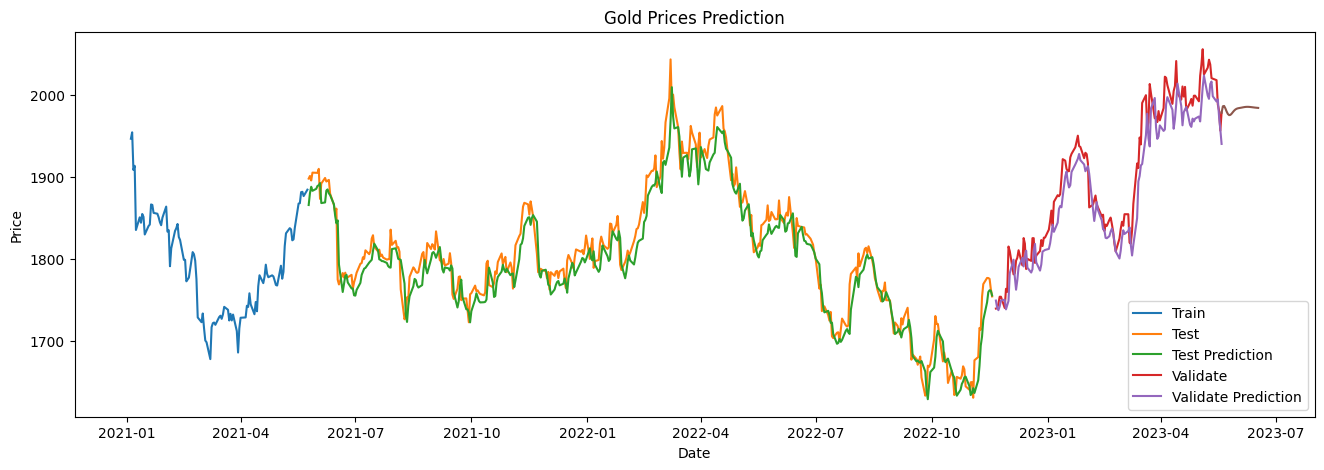

In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Price[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [ ]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  16.722737672156896
MAPE:  0.9201415366563939
RMSE:  21.27159452820793

** Validate **
MAE:  22.43710527492844
MAPE:  1.1692517987502906
RMSE:  27.632006882950225


# Split dataset (5-3-2)

---



In [ ]:
# Split data
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [ ]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [ ]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [ ]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.hdf5'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80

Epoch 1: loss improved from inf to 0.21027, saving model to save_model_5_3_2.hdf5
11/11 - 5s - loss: 0.2103 - 5s/epoch - 480ms/step
Epoch 2/80

Epoch 2: loss improved from 0.21027 to 0.08037, saving model to save_model_5_3_2.hdf5
11/11 - 1s - loss: 0.0804 - 1s/epoch - 97ms/step
Epoch 3/80

Epoch 3: loss improved from 0.08037 to 0.05088, saving model to save_model_5_3_2.hdf5
11/11 - 1s - loss: 0.0509 - 1s/epoch - 100ms/step
Epoch 4/80

Epoch 4: loss improved from 0.05088 to 0.04048, saving model to save_model_5_3_2.hdf5
11/11 - 2s - loss: 0.0405 - 2s/epoch - 149ms/step
Epoch 5/80

Epoch 5: loss improved from 0.04048 to 0.03519, saving model to save_model_5_3_2.hdf5
11/11 - 1s - loss: 0.0352 - 1s/epoch - 134ms/step
Epoch 6/80

Epoch 6: loss improved from 0.03519 to 0.03466, saving model to save_model_5_3_2.hdf5
11/11 - 1s - loss: 0.0347 - 1s/epoch - 96ms/step
Epoch 7/80

Epoch 7: loss did not improve from 0.03466
11/11 - 1s - loss: 0.0352 - 1s/epoch - 94ms/step
Epoch 8/80

Ep

In [ ]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_5_3_2.hdf5')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

18/18 [==============================] - 1s 24ms/step


In [ ]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 [==============================] - 0s 23ms/step


In [ ]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

9/9 [==============================] - 0s 24ms/step


In [ ]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.7477976056019875, 0.7623672916196069, 0.7415857239665686, 0.7744522249830585, 0.7836006324824938, 0.7821323695504856, 0.7848430088095775, 0.807318725999548, 0.8331827422633835, 0.8311497628190647, 0.8198554325728482, 0.8168059634063698, 0.8165800768014457, 0.8356674949175513, 0.8405240569234245, 0.8495595211203977, 0.8573526089902868, 0.8654845267675624, 0.8511407273548675, 0.8500112943302458, 0.8345380618929297, 0.8419923198554327, 0.8400722837135755, 0.8270838039304267, 0.7667720804156315, 0.7704992093968825, 0.7767110910323018, 0.7831488592726452, 0.7704992093968825, 0.766659137113169, 0.7543483171447933, 0.7567201264964987, 0.7343573526089902, 0.7431669302010389, 0.7413598373616446, 0.7496611700926135, 0.7527671109103231, 0.7437316467133499, 0.7333408628868305, 0.7169640840298168, 0.7061215269934493, 0.7238536254800092, 0.7371809351705445, 0.7470070024847528, 0.7414727806641066, 0.7573977863112713, 0.7573977863112713, 0.718319403659363, 0.7167381974248923, 0.73480912581

In [ ]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8546307682991028], [0.8435328602790833], [0.8316219449043274], [0.8199924230575562], [0.8091763257980347], [0.7993595600128174], [0.7905570864677429], [0.7827056646347046], [0.7757076621055603], [0.7694488763809204], [0.7638103365898132], [0.7586737275123596], [0.7539265155792236], [0.7494649887084961], [0.7451980710029602], [0.7410468459129333], [0.7369474172592163], [0.7328501343727112], [0.728718638420105], [0.7245298624038696], [0.7202720642089844], [0.7159430384635925], [0.7115485668182373], [0.7071005702018738], [0.7026150226593018], [0.6981105208396912], [0.6936066150665283], [0.6891228556632996], [0.6846771240234375], [0.6802854537963867]]


In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[1940.69008225]
 [1930.86399449]
 [1920.31807002]
 [1910.02129138]
 [1900.44471886]
 [1891.75295444]
 [1883.95924436]
 [1877.00759547]
 [1870.81156403]
 [1865.27003515]
 [1860.27767202]
 [1855.72971834]
 [1851.52653689]
 [1847.576301  ]
 [1843.79837207]
 [1840.12287737]
 [1836.49324324]
 [1832.86550897]
 [1829.20748246]
 [1825.49874017]
 [1821.72888565]
 [1817.89596626]
 [1814.00510106]
 [1810.06684486]
 [1806.09534106]
 [1802.10705515]
 [1798.11929698]
 [1794.1493764 ]
 [1790.21312561]
 [1786.32474079]]


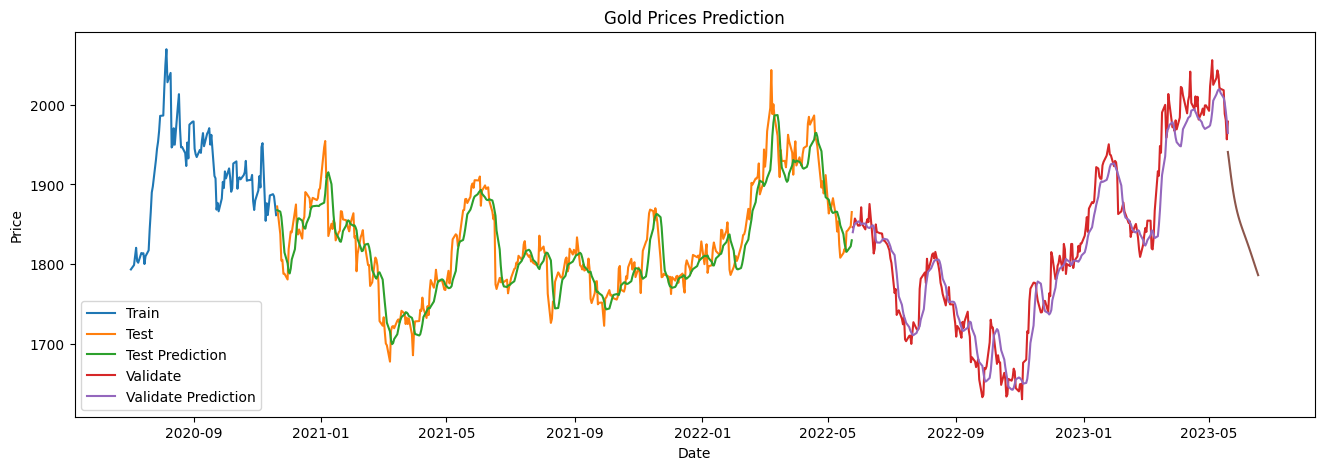

In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Price[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [ ]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  19.508470295384985
MAPE:  1.064520597189727
RMSE:  25.596760500867866

** Validate **
MAE:  20.520993464543267
MAPE:  1.124592422541305
RMSE:  26.843171547829584


# Evaluate Model

---
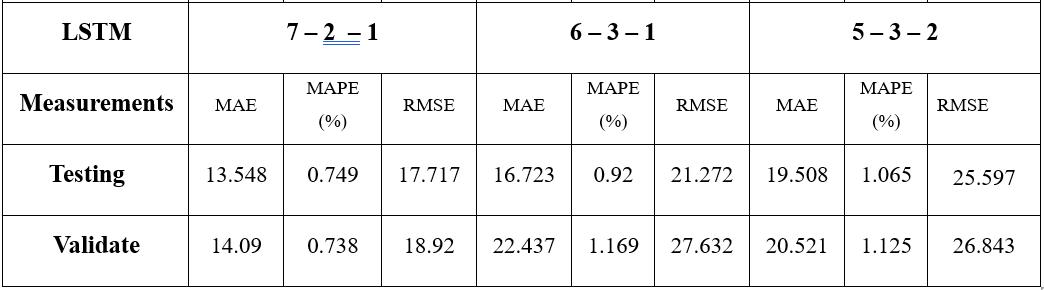
